# Revisando el Catálogo

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
catalog = scipy.io.readsav('cosmos2020_farmer_phot.sav')

In [3]:
print(catalog.keys())

dict_keys(['id', 'ra', 'dec', 'id2015', 'zphot', 'zlo', 'zhi', 'mag', 'emag', 'logm', 'logmlo', 'logmhi', 'ub0', 'dub0', 'uv0', 'duv0', 'vj0', 'dvj0'])


In [4]:
ra = catalog["ra"]
ra

array([150.47759181, 150.47797762, 150.47702381, ..., 150.07153936,
       150.08864562, 150.08666821])

In [5]:
dec = catalog["dec"]
dec

array([2.32892806, 2.32916986, 2.32948282, ..., 2.87415142, 2.87678241,
       2.87700635])

In [6]:
logm = catalog["logm"]
logm

array([8.52185, 5.27514,     nan, ..., 8.487  , 8.74967, 9.0175 ])

In [7]:
zphot = catalog["zphot"]
zphot

array([1.593 , 0.1151,    nan, ...,    nan,    nan,    nan])

In [8]:
#Para valores z>2

lista_de_arrays = [np.array(zphot)]
resultados = [array[array > 2] for array in lista_de_arrays]

print(resultados)

#Imprimir la lista completa
#print("Lista completa:")
#for array in resultados:
 #   for elemento in array:
  #      print(elemento, end=' ')

[array([2.8698, 2.8235, 4.775 , ..., 4.2732, 2.6115, 7.6066])]


In [9]:
#Zlow
zlo = catalog["zlo"]
zlo

array([1.514 , 0.0234,    nan, ..., 1.4051, 2.3782, 1.4486])

In [10]:
#Zhi
zhi = catalog["zhi"]
zhi

array([1.6732, 0.4184,    nan, ..., 1.9242, 2.9061, 3.9265])

# Graficos

In [11]:
ra2 = ra[(zphot > 2) & (zphot < 2.1)]
dec2 = dec[(zphot > 2) & (zphot < 2.1)]
z2 = zphot[(zphot > 2) & (zphot < 2.1)]
lower_z = catalog["zlo"][(zphot > 2) & (zphot < 2.1)]
higher_z = catalog["zhi"][(zphot > 2) & (zphot < 2.1)]

Text(0, 0.5, 'dec2')

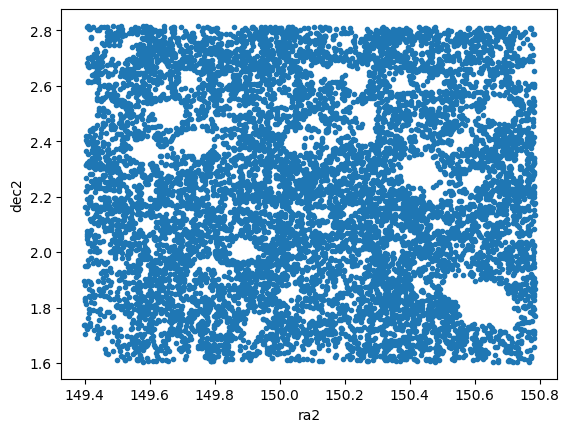

In [12]:
# Datos 
x = np.array(ra2)
y = np.array(dec2)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = ".")

plt.xlabel('ra2')
plt.ylabel('dec2')

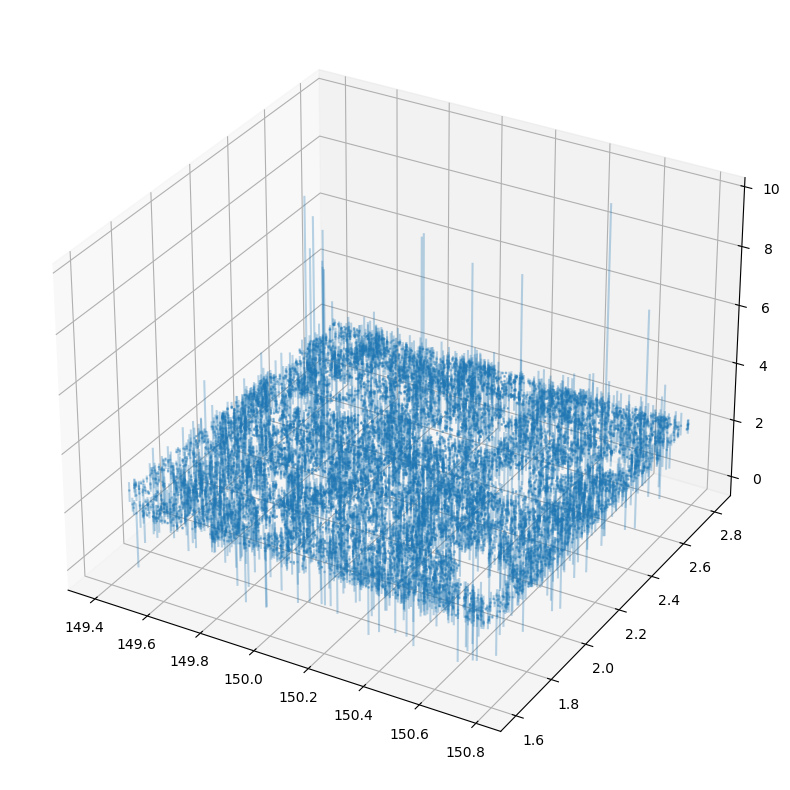

In [13]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.errorbar(ra2,dec2,z2, zerr = np.stack((z2 - lower_z, higher_z - z2)), fmt = "None", alpha = 0.3)
ax.scatter(ra2,dec2,z2, s = 1, alpha = 0.3)

### Histograma eje X

Text(0.5, 1.0, 'X-axis histogram')

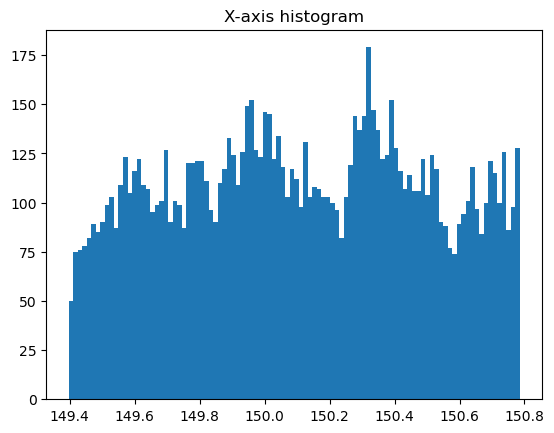

In [14]:
plt.hist(x, bins = 100);
plt.title("X-axis histogram")

### Histograma eje Y

Text(0.5, 1.0, 'Y-axis histogram')

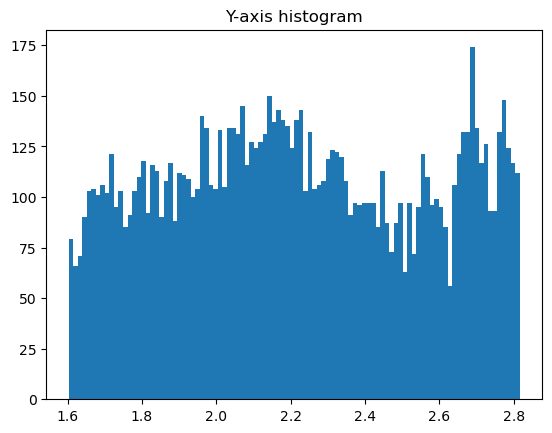

In [15]:
plt.hist(y, bins = 100);
plt.title("Y-axis histogram")

### Mapa de Densidad 
Juntando los graficos de histograma en el eje x e y, para que quede "grillado"

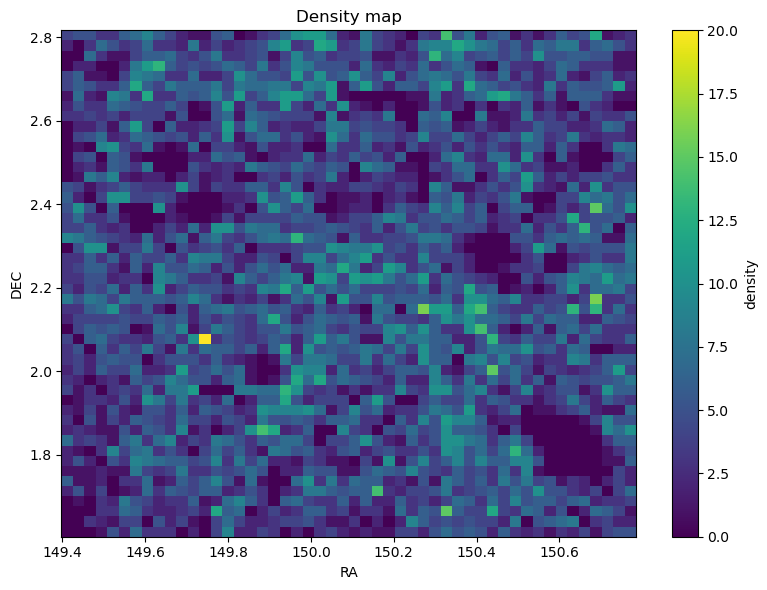

In [16]:
import matplotlib as mpl
from matplotlib import cm

fig = plt.figure(figsize = (8,6))
hist = np.histogram2d(x,y,bins = 50)
c = hist[0].flatten()
color = cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(c))
hist = plt.hist2d(x,y,bins = 50, cmap = color, norm = norm);
plt.colorbar(label = "density")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Density map")
fig.tight_layout()

### Distancia de las galaxias, tamañol pixel 0.005

Calculando densidad...: 100%|██████████| 314/314 [9:04:28<00:00, 104.04s/it]    


 Densidad promedio por pixel 11.36923373866049  gax/pix


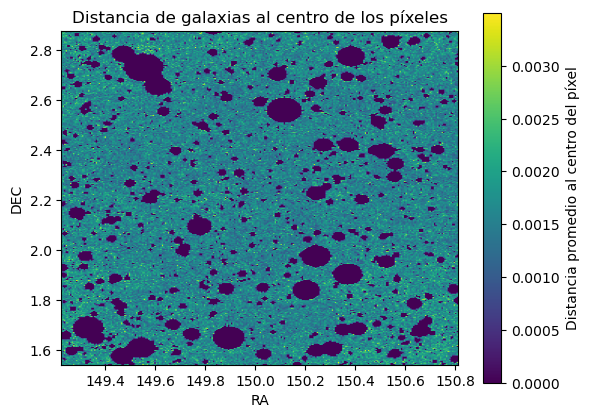

In [26]:
from tqdm import tqdm

ra = catalog["ra"]
dec = catalog["dec"]
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.005

ra_centers = np.arange(ra_min + 2*pixel_size, ra_max - 2*pixel_size, pixel_size)
dec_centers = np.arange(dec_min + 2*pixel_size, dec_max - 2*pixel_size, pixel_size)

distances = np.zeros((len(ra_centers), len(dec_centers)))

N = 0

for i in tqdm(range(len(ra_centers)), desc = "Calculando densidad..."):
    for j in range(len(dec_centers)):
        mask = np.where((ra <= ra_centers[i] + pixel_size/2) & (ra >= ra_centers[i] - pixel_size/2) 
                          & (dec <= dec_centers[j] + pixel_size/2) & (dec >= dec_centers[j]-+ pixel_size/2))
        
        ras,decs = np.array(ra)[mask],np.array(dec)[mask]
        dists = np.sqrt((ras - ra_centers[i])**2 + (decs - dec_centers[j])**2)
        dists.sort()
        N+=len(dists)
        distances[i, j] = dists[4] if len(dists) >= 5 else 0
        
print(f" Densidad promedio por pixel \033[91m{N / (len(ra_centers)*len(dec_centers))} \033[0m gax/pix")

ax = plt.axes()
plt.imshow(distances, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Distancia promedio al centro del píxel')
ax.set(xlabel = "RA", ylabel = "DEC", title = 'Distancia de galaxias al centro de los píxeles')
plt.show()

Calculando densidad...: 100%|██████████| 314/314 [7:07:22<00:00, 81.66s/it]      


 Densidad promedio por pixel 11.36923373866049  gax/pix


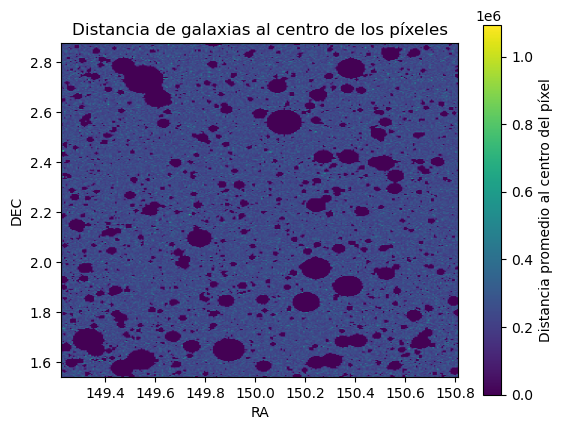

In [21]:
from tqdm import tqdm

ra = catalog["ra"]
dec = catalog["dec"]
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.005

ra_centers = np.arange(ra_min + 2*pixel_size, ra_max - 2*pixel_size, pixel_size)
dec_centers = np.arange(dec_min + 2*pixel_size, dec_max - 2*pixel_size, pixel_size)

distances2 = np.zeros((len(ra_centers), len(dec_centers)))

N = 0

for i in tqdm(range(len(ra_centers)), desc = "Calculando densidad..."):
    for j in range(len(dec_centers)):
        mask = np.where((ra <= ra_centers[i] + pixel_size/2) & (ra >= ra_centers[i] - pixel_size/2) 
                          & (dec <= dec_centers[j] + pixel_size/2) & (dec >= dec_centers[j]-+ pixel_size/2))
        
        ras,decs = np.array(ra)[mask],np.array(dec)[mask]
        dists = np.sqrt((ras - ra_centers[i])**2 + (decs - dec_centers[j])**2)
        dists.sort()
        N+=len(dists)
        distances2[i, j] = 1/np.mean(dists**2) if len(dists) >= 5 else 0 #aca se hizo el cambio y tomamos 1/d^2
        
print(f" Densidad promedio por pixel \033[91m{N / (len(ra_centers)*len(dec_centers))} \033[0m gax/pix")

ax = plt.axes()
plt.imshow(distances2, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Distancia promedio al centro del píxel')
ax.set(xlabel = "RA", ylabel = "DEC", title = 'Distancia de galaxias al centro de los píxeles')
plt.show()